Selected Features:
Index(['Bald', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Brown_Hair', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee',
       'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mustache',
       'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose',
       'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Straight_Hair',
       'Wavy_Hair', 'Young'],
      dtype='object')

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73     29734
           1       0.74      0.76      0.75     31046

    accuracy                           0.74     60780
   macro avg       0.74      0.74      0.74     60780
weighted avg       0.74      0.74      0.74     60780



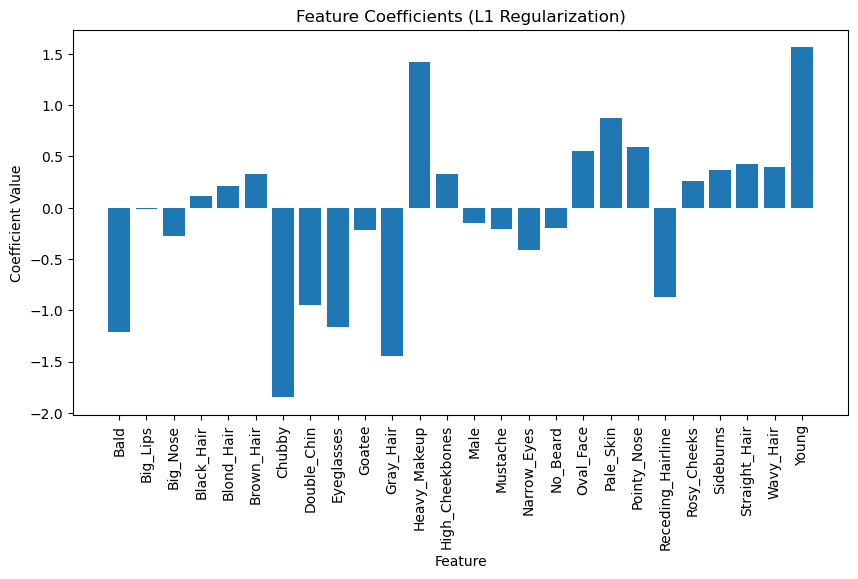

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Load and preprocess the dataset
celeb_data = pd.read_csv('../list_attr_celeba.csv')

# Replace -1 with 0
celeb_data.replace(-1, 0, inplace=True)

# Drop unnecessary columns
celeb_data.drop(columns=[
    'image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Bags_Under_Eyes', 
    'Bushy_Eyebrows', 'Bangs', 'Blurry', 'Smiling', 'Mouth_Slightly_Open', 
    'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 
    'Wearing_Necktie'
], inplace=True)

# Define features (X) and target (y)
X = celeb_data.drop("Attractive", axis=1)
y = celeb_data["Attractive"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply L1 feature selection using Logistic Regression
logistic = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, C=1.0)
logistic.fit(X_train, y_train)

# Get coefficients
coefficients = logistic.coef_[0]

# Select features with non-zero coefficients
selected_features = X.columns[coefficients != 0]
print("Selected Features:")
print(selected_features)

# Transform datasets to keep only selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train KNN model on selected features
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust the number of neighbors as needed
knn.fit(X_train_selected, y_train)

# Make predictions
y_pred = knn.predict(X_test_selected)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot coefficients
plt.figure(figsize=(10, 5))
plt.bar(X.columns, coefficients)
plt.xticks(rotation=90)
plt.title("Feature Coefficients (L1 Regularization)")
plt.ylabel("Coefficient Value")
plt.xlabel("Feature")
plt.show()

In [3]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.6f}")

# precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.6f}")

# recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.6f}")

# F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.6f}")

Accuracy: 0.742349
Precision: 0.740016
Recall: 0.763995
F1 Score: 0.751815
